<a href="https://colab.research.google.com/github/GiX7000/deep-learning-with-tensorflow/blob/main/deep_learning_with_tensorflow_Part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with TensorFlow with Laurence Moroney, Part5

## Example 1. Tensors revisited.

What is a tensor? A tensor is a concept in mathematics that's basically a flexible data structure that can hold data in a variety of different ways. An important term to remember is the dimensionality of a tensor, which can have a huge impact on the datatype that the tensor ultimately represents. 

A single value or a scalar could be seen as a tensor with no dimensions. A vector is a tensor where the values are represented in a single dimension, like a horizontal or a vertical one. A classical matrix is similar to the vector, but each dimension is greater than one, such as the three by three matrix. Regardless of the number of dimensions and the number of values in each dimension, a tensor is a generic data structure that can describe each of these and a whole lot more. For example, a Tensor could have three dimensions, such as the three by three by three tensor, that you can visualize as a cube. Remember this is a very generic term, a tensor is simply a very flexible way of storing data. 

A tensor has two fundamental properties. The shape of the tensor and the underlying data type that's stored in the tensor.

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Create a 1D uint8 NumPy array comprising of first 25 natural numbers
x = np.arange(0, 25)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
# Convert NumPy array to Tensor using `tf.constant`
x = tf.constant(x)
x

<tf.Tensor: shape=(25,), dtype=int64, numpy=
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])>

In [ ]:
# Square the input tensor x
x = tf.square(x)
x

<tf.Tensor: shape=(25,), dtype=int64, numpy=
array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
       169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576])>

In [ ]:
# Reshape tensor x into a 5 x 5 matrix. 
x = tf.reshape(x, (5, 5))
x

<tf.Tensor: shape=(5, 5), dtype=int64, numpy=
array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576]])>

In [ ]:
d = tf.constant(-1, shape=(2,2))
d

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[-1, -1],
       [-1, -1]], dtype=int32)>

In [ ]:
# Try this and look at the error
# Try to change the input to `shape` to avoid an error
tmp = tf.constant([1,2,3,4])
tf.reshape(tmp, shape=(2,2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
# you can also change the data type of the values within the tensor

# Cast tensor x into float32. Notice the change in the dtype.
x = tf.cast(x, tf.float32)
x

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[  0.,   1.,   4.,   9.,  16.],
       [ 25.,  36.,  49.,  64.,  81.],
       [100., 121., 144., 169., 196.],
       [225., 256., 289., 324., 361.],
       [400., 441., 484., 529., 576.]], dtype=float32)>

In [ ]:
# Let's define a constant and see how broadcasting works in the following cell.
y = tf.constant(2, dtype=tf.float32)  # this a tensor of dimensionality 0=> it is a scalar=> a number of 2
y

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
# Multiply tensor `x` and `y`. `y` is multiplied to each element of x. this is broadcasting!
result = tf.multiply(x, y)
result

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[   0.,    2.,    8.,   18.,   32.],
       [  50.,   72.,   98.,  128.,  162.],
       [ 200.,  242.,  288.,  338.,  392.],
       [ 450.,  512.,  578.,  648.,  722.],
       [ 800.,  882.,  968., 1058., 1152.]], dtype=float32)>

In [ ]:
# Now let's define an array that matches the number of row elements in the `x` array.
y = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
y

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 2., 3., 4., 5.], dtype=float32)>

In [ ]:
# Let's see first the contents of `x` again.
x

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[  0.,   1.,   4.,   9.,  16.],
       [ 25.,  36.,  49.,  64.,  81.],
       [100., 121., 144., 169., 196.],
       [225., 256., 289., 324., 361.],
       [400., 441., 484., 529., 576.]], dtype=float32)>

In [ ]:
# Add tensor `x` and `y`. `y` is added element wise to each row of `x`. this is another example of broadcasting!
result = x + y
result

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[  1.,   3.,   7.,  13.,  21.],
       [ 26.,  38.,  52.,  68.,  86.],
       [101., 123., 147., 173., 201.],
       [226., 258., 292., 328., 366.],
       [401., 443., 487., 533., 581.]], dtype=float32)>

In [ ]:
# When using tf.constant(), you can pass in a 1D array (a vector) and set the shape parameter to turn this vector into a multi-dimensional array
z = tf.constant([1,2,3,4], shape=(2,2))
z

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [ ]:
# this cannot be done for tf.Variable
try:
    # This will produce a ValueError
    tf.Variable([1,2,3,4], shape=(2,2))
except ValueError as v:
    # See what the ValueError says
    print(v)

In this `tf.Variable` creation, the initial value's shape ((4,)) is not compatible with the explicitly supplied `shape` argument ((2, 2)).


Note, however, that for tf.Variable(), the shape of the tensor is derived from the shape given by the input array. Setting shape to something other than None will not reshape a 1D array into a multi-dimensional array, and will give a ValueError.

When a variable's values can be modified like when using tf.Variable, we say that it's mutable. Mutable is just the software engineering way of saying that an object can be changed. But when using tf.constant, it is immutable, which means that it cannot be changed.

In [ ]:
model = tf.keras.Sequential([ tf.keras.layers.Dense(1, input_shape=(2,)) ])

# let's see the variables of a simple model
model.variables

[<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.05029905],
        [ 0.9786209 ]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

TensorFlow supports two types of code execution, graph-based where all of the data and ops are loaded into a graph before evaluating them within a session, or eager based where all of the code is executed line by line. TensorFlow is compatible with NumPy operations, so a NumPy scale should come in handy. Examples 2, 3 and 4 are eager based coded, whereas example 5 and 6 are graph-based.

Eager and graph mode do seem to conflict with each other, but we can imagine benefiting from both approaches. Using Eager mode, for exampe, if we develop a new model or we're debugging, and then switch to graph mode if we want to squeeze some more performance out of it. Or maybe we're ready to deploy to production and we want the best possible model. One workflow is to use Eager mode when developing and debugging a new model, and then switching to graph mode if you want to speed it up. Here's where AutoGraph really can help you. It's a technology that allows you to take your Eager-style Pythonic code and automatically turn it into graphs and vice versa.

Eager Mode: 1) intuitive interface, 2) easier debugging and 3) natural control flow.

Graph Mode: 1) Parallelism, 2) Distributed execution, 3) Compilation and 4) Portability.

At the core of all machine learning are optimizing functions that are used to match features to labels by tweaking parameters. These functions operate on the principle of gradient descent and each optimizing function has a different rate of convergence towards the optimal value. Over time, they've evolved as researchers have experimented with these algorithms with different scenarios. Intensive flow optimizers are implemented using TensorFlow automatic differentiation API call Gradient Tape. This API lets you compute and track the gradient of every differentiable TensorFlow operation. Take a look of Gradient Tape basics here: https://github.com/BaoLocPham/TensorFlow-Advanced-Techniques-Specialization/blob/main/MOOC%202%20-%20Custom%20and%20Distributed%20Training%20with%20TensorFlow/week%201%20-%20Differentiation%20and%20Gradients/Labs/C2_W1_Lab_2_gradient-tape-basics.ipynb.

## Example 2. A very simple custom model using a custom loss function and a custom training loop.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# define the model
class Model(object):
  def __init__(self):
    # Initialize the weights to `2.0` and the bias to `1.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

In [ ]:
# define the loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [ ]:
# create a simple dataset
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

In [ ]:
# function to visualize the actual data and predictions
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()

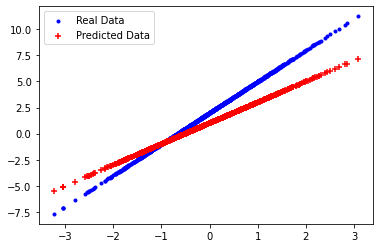

Current loss: 1.926489


In [ ]:
# plot actual .vs predicted values
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

In [ ]:
# define a training loop
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [ ]:
# train the model
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=1.92649
Epoch  1: w=2.20 b=1.19, loss=1.25546
Epoch  2: w=2.36 b=1.34, loss=0.81826
Epoch  3: w=2.48 b=1.47, loss=0.53337
Epoch  4: w=2.58 b=1.57, loss=0.34771
Epoch  5: w=2.67 b=1.65, loss=0.22670
Epoch  6: w=2.73 b=1.71, loss=0.14782
Epoch  7: w=2.78 b=1.77, loss=0.09639
Epoch  8: w=2.83 b=1.81, loss=0.06286
Epoch  9: w=2.86 b=1.85, loss=0.04100
Epoch 10: w=2.89 b=1.88, loss=0.02674
Epoch 11: w=2.91 b=1.90, loss=0.01744
Epoch 12: w=2.93 b=1.92, loss=0.01138
Epoch 13: w=2.94 b=1.93, loss=0.00742
Epoch 14: w=2.95 b=1.95, loss=0.00484


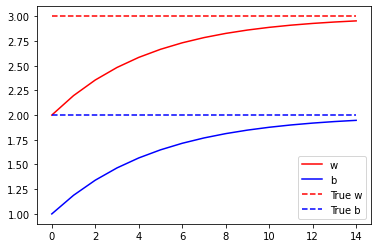

In [ ]:
# plot the progression of trainable variables over epochs
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

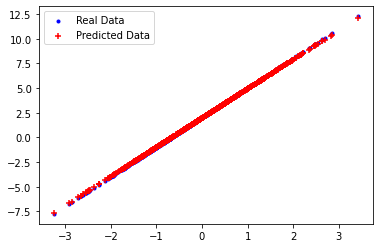

In [ ]:
# plots for evaluation:
# plot the actual outputs in red and the model's predictions in blue on a set of random test examples.

test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

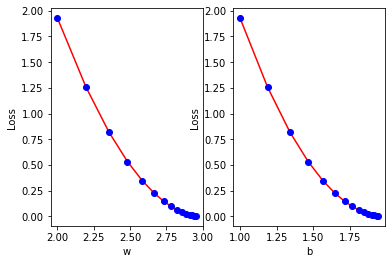

In [ ]:
# Visualize the cost function against the values of each of the trainable weights the model approximated to over time
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)

We can see the loss function in red, and we can see the values of w per epoch in blue. Similarly the loss function in red and the values of b per epoch in blue. We can see that, the gradient descent is taking place, that the ball is rolling down the hill. This is how gradient descent works with a ball effectively rolling down a hill towards a local minimum. That's the concept of gradient descent. That's how learning can take place and how learning works. This was a very simple example of that.

## Example 3. A custom model using custom training loop on Fashion MNIST Dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tqdm import tqdm
import tensorflow_datasets as tfds
import matplotlib.ticker as mticker

Load and Preprocess Data.

In [ ]:
# load the Fashion MNIST dataset using Tensorflow Datasets. This dataset has 28 x 28 grayscale images of articles of clothing belonging to 10 clases
#Get the data and process the data
train_data = tfds.load('fashion_mnist' , split='train')
test_data  = tfds.load('fashion_mnist' , split="test")

class_names = ["T-shirt/top", "Trouser/pants", "Pullover shirt", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete4BRGHR/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete4BRGHR/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# normalize the images by dividing them by 255.0 so as to make the pixels fall in the range (0, 1). You also reshape the data so as to flatten the 28 x 28 pixel array into a flattened 784 pixel array
def format_image(data):        
    image = data["image"]
    image = tf.reshape(image, [-1])
    image = tf.cast(image, 'float32')
    image = image / 255.0
    return image, data["label"]

train_data = train_data.map(format_image)
test_data = test_data.map(format_image)

In [ ]:
# shuffle and batch your training and test datasets before feeding them to the model
batch_size = 64
train = train_data.shuffle(buffer_size=1024).batch(batch_size)

test =  test_data.batch(batch_size=batch_size)

 I'm specifying a batch size of 64 and then I'm going to shuffle the training data, batching it in those batch sizes. The buffer size of 1,024 for the training data, what that does is, it will take the first 1,024 records and it will pick random ones of them until I have 64 records in the batch. Every time it picks one out of that, it replaces it with the next one in the dataset. For example, in this case there were 60,000 items in the dataset. So if you can imagine that my first batch on my first record, it'll pick one of them between 1 and 1,024. Say it picks number 51, then what will happen is the 51st record will be added to the batch, and then the 1,025th record will become the 51st record, and so on. As a result, we end up shuffling like that. It's not a pure shuffle of the entire dataset, it's taking them in chunks of 1,024 and shuffling like that. It does make it a little bit quicker.

Build and train the model.

In [ ]:
# define th emodel
def base_model():
  inputs = tf.keras.Input(shape=(784,), name='digits')
  x = tf.keras.layers.Dense(64, activation='relu', name='dense_1')(inputs)
  x = tf.keras.layers.Dense(64, activation='relu', name='dense_2')(x)
  outputs = tf.keras.layers.Dense(10, activation='softmax', name='predictions')(x)
  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  return model

In [ ]:
# define optimizer and loss function
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
# define metrics
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [ ]:
# building training loop

# function that uses gradient tape to calculate the gradients and then update the model trainable weights using the optimizer
def apply_gradient(optimizer, model, x, y):
  with tf.GradientTape() as tape:
    logits = model(x)
    loss_value = loss_object(y_true=y, y_pred=logits)
  
  gradients = tape.gradient(loss_value, model.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  
  return logits, loss_value

# function that performs training during one epoch
def train_data_for_one_epoch():
  losses = []
  pbar = tqdm(total=len(list(enumerate(train))), position=0, leave=True, bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} ')
  for step, (x_batch_train, y_batch_train) in enumerate(train):
      logits, loss_value = apply_gradient(optimizer, model, x_batch_train, y_batch_train)
      
      losses.append(loss_value)
      
      train_acc_metric(y_batch_train, logits)
      pbar.set_description("Training loss for step %s: %.4f" % (int(step), float(loss_value)))
      pbar.update()
  return losses

The idea with zip here is that, every one of the neurons in my model has two parameters within it, it has a weight and a bias. But when we get the gradients, we're going to be getting separate arrays of them and by doing a zip, it actually just puts them together. So that the first item in the W gradients and the first item in the B gradients will be zipped together to become the new applied gradients to the first of the trainable weights, and that's what zip does. Don't confuse that with zip for compression, zip is a Python function that allows us to build tuples, and then this will return the predictions or the logits and it will return the loss_value that are calculated.

In [ ]:
# function that valdates the model on test set
def perform_validation():
  losses = []
  for x_val, y_val in test:
      val_logits = model(x_val)
      val_loss = loss_object(y_true=y_val, y_pred=val_logits)
      losses.append(val_loss)
      val_acc_metric(y_val, val_logits)
  return losses

Next you define the training loop that runs through the training samples repeatedly over a fixed number of epochs. Here you combine the functions you built earlier to establish the following flow:

1)Perform training over all batches of training data.
2)Get values of metrics.
3)Perform validation to calculate loss and update validation metrics on test data.
4)Reset the metrics at the end of epoch.
5)Display statistics at the end of each epoch.
Note : You also calculate the training and validation losses for the whole epoch at the end of the epoch.

In [ ]:
model = base_model()

# Iterate over epochs.
epochs = 10
epochs_val_losses, epochs_train_losses = [], []
for epoch in range(epochs):
  print('Start of epoch %d' % (epoch,))
  
  losses_train = train_data_for_one_epoch()
  train_acc = train_acc_metric.result()

  losses_val = perform_validation()
  val_acc = val_acc_metric.result()

  losses_train_mean = np.mean(losses_train)
  losses_val_mean = np.mean(losses_val)
  epochs_val_losses.append(losses_val_mean)
  epochs_train_losses.append(losses_train_mean)

  print('\n Epoch %s: Train loss: %.4f  Validation Loss: %.4f, Train Accuracy: %.4f, Validation Accuracy %.4f' % (epoch, float(losses_train_mean), float(losses_val_mean), float(train_acc), float(val_acc)))
  
  train_acc_metric.reset_states()
  val_acc_metric.reset_states()

Start of epoch 0


Training loss for step 937: 0.5436: 100%|██████████| 938/938 



 Epoch 0: Train loss: 0.5359  Validation Loss: 0.4432, Train Accuracy: 0.8134, Validation Accuracy 0.8443
Start of epoch 1


Training loss for step 937: 0.2482: 100%|██████████| 938/938 



 Epoch 1: Train loss: 0.3891  Validation Loss: 0.4104, Train Accuracy: 0.8604, Validation Accuracy 0.8545
Start of epoch 2


Training loss for step 937: 0.2421: 100%|██████████| 938/938 



 Epoch 2: Train loss: 0.3517  Validation Loss: 0.3778, Train Accuracy: 0.8726, Validation Accuracy 0.8661
Start of epoch 3


Training loss for step 937: 0.2989: 100%|██████████| 938/938 



 Epoch 3: Train loss: 0.3270  Validation Loss: 0.3765, Train Accuracy: 0.8807, Validation Accuracy 0.8653
Start of epoch 4


Training loss for step 937: 0.1393: 100%|██████████| 938/938 



 Epoch 4: Train loss: 0.3085  Validation Loss: 0.3841, Train Accuracy: 0.8868, Validation Accuracy 0.8660
Start of epoch 5


Training loss for step 937: 0.4164: 100%|██████████| 938/938 



 Epoch 5: Train loss: 0.2933  Validation Loss: 0.3680, Train Accuracy: 0.8924, Validation Accuracy 0.8755
Start of epoch 6


Training loss for step 937: 0.4078: 100%|██████████| 938/938 



 Epoch 6: Train loss: 0.2845  Validation Loss: 0.3565, Train Accuracy: 0.8949, Validation Accuracy 0.8752
Start of epoch 7


Training loss for step 937: 0.4134: 100%|██████████| 938/938 



 Epoch 7: Train loss: 0.2705  Validation Loss: 0.3503, Train Accuracy: 0.9000, Validation Accuracy 0.8779
Start of epoch 8


Training loss for step 937: 0.2774: 100%|██████████| 938/938 



 Epoch 8: Train loss: 0.2616  Validation Loss: 0.3498, Train Accuracy: 0.9015, Validation Accuracy 0.8810
Start of epoch 9


Training loss for step 937: 0.2551: 100%|██████████| 938/938 



 Epoch 9: Train loss: 0.2527  Validation Loss: 0.3742, Train Accuracy: 0.9043, Validation Accuracy 0.8732


There are 64 items per batch. There were 60,000 records(training samples), and if you divide 60,000 by 64, you'll see that indeed 938 batches.

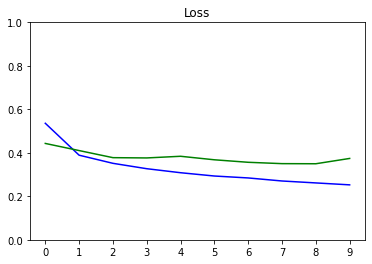

In [ ]:
# plots for evaluation
def plot_metrics(train_metric, val_metric, metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.plot(train_metric,color='blue',label=metric_name)
  plt.plot(val_metric,color='green',label='val_' + metric_name)

plot_metrics(epochs_train_losses, epochs_val_losses, "Loss", "Loss", ylim=1.0)

In [ ]:
# This function displays a row of images with their predictions and true labels
# utility to display a row of images with their predictions and true labels
def display_images(image, predictions, labels, title, n):

  display_strings = [str(i) + "\n\n" + str(j) for i, j in zip(predictions, labels)] 

  plt.figure(figsize=(17,3))
  plt.title(title)
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], display_strings)
  plt.grid(None)
  image = np.reshape(image, [n, 28, 28])
  image = np.swapaxes(image, 0, 1)
  image = np.reshape(image, [28, 28*n])
  plt.imshow(image)

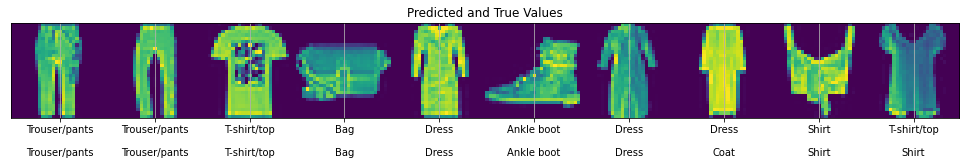

In [ ]:
# make predictions on the test dataset and plot the images with their true and predicted values
test_inputs = test_data.batch(batch_size=1000001)
x_batches, y_pred_batches, y_true_batches = [], [], []

for x, y in test_inputs:
  y_pred = model(x)
  y_pred_batches = y_pred.numpy()
  y_true_batches = y.numpy()
  x_batches = x.numpy()

indexes = np.random.choice(len(y_pred_batches), size=10)
images_to_plot = x_batches[indexes]
y_pred_to_plot = y_pred_batches[indexes]
y_true_to_plot = y_true_batches[indexes]

y_pred_labels = [class_names[np.argmax(sel_y_pred)] for sel_y_pred in y_pred_to_plot]
y_true_labels = [class_names[sel_y_true] for sel_y_true in y_true_to_plot]
display_images(images_to_plot, y_pred_labels, y_true_labels, "Predicted and True Values", 10)

## Example 4. Binary Classification with custom training loop on Breast Cancer Dataset.

We will train a neural network on the Breast Cancer Dataset to predict if the tumor is malignant or benign.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tqdm import tqdm
import tensorflow_datasets as tfds

Load and preprocess the data.

In [ ]:
DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data_file = tf.keras.utils.get_file("breast_cancer.csv", DATASET_URL)
col_names = ["id", "clump_thickness", "un_cell_size", "un_cell_shape", "marginal_adheshion", "single_eph_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitoses", "class"]
df = pd.read_csv(data_file, names=col_names, header=None)

df.head()

19889/19889 [==============================] - 0s 0us/step


,id,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# pop the id column since it is of no use for our problem at hand
df.pop("id")

0      1000025
1      1002945
2      1015425
3      1016277
4      1017023
        ...   
694     776715
695     841769
696     888820
697     897471
698     897471
Name: id, Length: 699, dtype: int64

Don't forget to make a thorough analysis of what you have in your data. For example, here, some values of the bare_nuclei column are unknown(with ?) and all the values are of type obj, which is something not acceptable from a NN.

In [ ]:
# drop the rows with unknown values(?). We also convert the bare_nuclei column to numeric as it is of type obj
df = df[df["bare_nuclei"] != '?' ]
df.bare_nuclei = pd.to_numeric(df.bare_nuclei)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


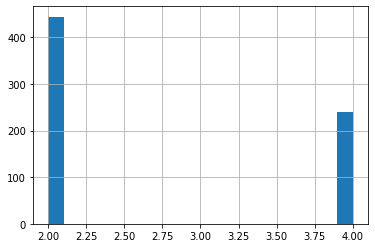

In [ ]:
# check the class distribution of the data. You can see that there are two classes, 2.0 and 4.0
df['class'].hist(bins=20)

We are going to model this problem as a binary classification problem which detects whether the tumor is malignant or not. Hence, we change the dataset so that:

benign(2.0) = 0
malignant(4.0) = 1

In [ ]:
df['class'] = np.where(df['class'] == 2, 0, 1)

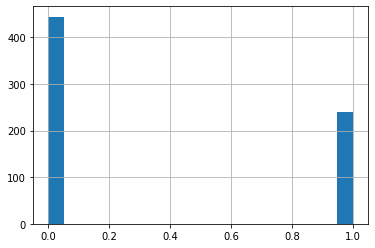

In [ ]:
df['class'].hist(bins=20)

In [ ]:
# split the dataset into training and testing sets
train, test = train_test_split(df, test_size = 0.2)

# and get some statistics for training
train_stats = train.describe()
train_stats.pop('class')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
clump_thickness,546.0,4.408425,2.872815,1.0,2.0,4.0,6.00,10.0
un_cell_size,546.0,3.142857,3.074266,1.0,1.0,1.0,5.00,10.0
un_cell_shape,546.0,3.192308,3.004220,1.0,1.0,1.0,5.00,10.0
marginal_adheshion,546.0,2.826007,2.875544,1.0,1.0,1.0,3.75,10.0
single_eph_cell_size,546.0,3.181319,2.156726,1.0,2.0,2.0,4.00,10.0
bare_nuclei,546.0,3.494505,3.629260,1.0,1.0,1.0,5.75,10.0
bland_chromatin,546.0,3.413919,2.458632,1.0,2.0,3.0,4.00,10.0
normal_nucleoli,546.0,2.831502,3.058001,1.0,1.0,1.0,3.00,10.0
mitoses,546.0,1.611722,1.792791,1.0,1.0,1.0,1.00,10.0


In [ ]:
# pop the class column from the training and test sets to create train and test outputs
train_Y = train.pop("class")
test_Y = test.pop("class")

# normalize the data by using the formula: X = (X - mean(X)) / StandardDeviation(X)
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

norm_train_X = norm(train)
norm_test_X = norm(test)

In [ ]:
# create Tensorflow datasets for training and test sets to easily be able to build and manage an input pipeline for our model
train_dataset = tf.data.Dataset.from_tensor_slices((norm_train_X.values, train_Y.values))
test_dataset = tf.data.Dataset.from_tensor_slices((norm_test_X.values, test_Y.values))

In [ ]:
# shuffle and prepare a batched dataset to be used for training in our custom training loop
batch_size = 32

train_dataset = train_dataset.shuffle(buffer_size=len(train)).batch(batch_size)
test_dataset =  test_dataset.batch(batch_size=batch_size)

In [ ]:
a = enumerate(train_dataset)    

print(len(list(a)))   # training samples/batch_size

18


Build and train the model.

In [ ]:
# define the model
def base_model():
    inputs = tf.keras.layers.Input(shape=(len(train.columns)))

    x = tf.keras.layers.Dense(128, activation='relu')(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

model = base_model()

# define optimizer and loss
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
loss_object = tf.keras.losses.BinaryCrossentropy()

In [ ]:
# reshape test_Y(which is of shape (n,), but must have the same output with predictions which are of shape(n,1))
#train_Y1=np.asarray(train_Y).astype('float32').reshape((-1,1))
test_Y1=np.asarray(test_Y).astype('float32').reshape((-1,1))

In [ ]:
# Evaluate untrained model: calculate the loss on the model before training begins
outputs = model(norm_test_X.values)
loss_value = loss_object(y_true=test_Y1, y_pred=outputs)
print("Loss before training %.4f" % loss_value.numpy())

Loss before training 0.8000


In [ ]:
# plot the confusion matrix to visualize the true outputs against the outputs predicted by the model
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

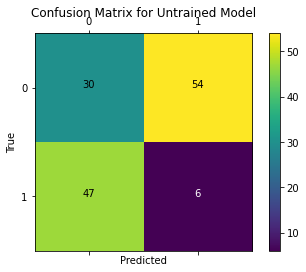

In [ ]:
plot_confusion_matrix(test_Y.values, tf.round(outputs), title='Confusion Matrix for Untrained Model')

In [ ]:
# define custom F1 Score metric
class F1Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        '''initializes attributes of the class'''
        
        # call the parent class init
        super(F1Score, self).__init__(name=name, **kwargs)

        # Initialize Required variables
        # true positives
        self.tp = tf.Variable(0, dtype = 'int32')
        # false positives
        self.fp = tf.Variable(0, dtype = 'int32')
        # true negatives
        self.tn = tf.Variable(0, dtype = 'int32')
        # false negatives
        self.fn = tf.Variable(0, dtype = 'int32')

    def update_state(self, y_true, y_pred, sample_weight=None):
        '''
        Accumulates statistics for the metric
        
        Args:
            y_true: target values from the test data
            y_pred: predicted values by the model
        '''

        # Calulcate confusion matrix.
        conf_matrix = tf.math.confusion_matrix(y_true, y_pred, num_classes=2)
        
        # Update values of true positives, true negatives, false positives and false negatives from confusion matrix.
        self.tn.assign_add(conf_matrix[0][0])
        self.tp.assign_add(conf_matrix[1][1])
        self.fp.assign_add(conf_matrix[0][1])
        self.fn.assign_add(conf_matrix[1][0])

    def result(self):
        '''Computes and returns the metric value tensor.'''

        # Calculate precision
        if (self.tp + self.fp == 0):
            precision = 1.0
        else:
            precision = self.tp / (self.tp + self.fp)
      
        # Calculate recall
        if (self.tp + self.fn == 0):
            recall = 1.0
        else:
            recall = self.tp / (self.tp + self.fn)

        # Return F1 Score
        # 2 * ((precision * recall) / (precision + recall))
        f1_score = 2 * (precision*recall) / (precision + recall)    
        return f1_score

    def reset_states(self):
        '''Resets all of the metric state variables.'''
        
        # The state of the metric will be reset at the start of each epoch.
        self.tp.assign(0)
        self.tn.assign(0) 
        self.fp.assign(0)
        self.fn.assign(0)

In [ ]:
# Test Code:

test_F1Score = F1Score()

test_F1Score.tp = tf.Variable(2, dtype = 'int32')
test_F1Score.fp = tf.Variable(5, dtype = 'int32')
test_F1Score.tn = tf.Variable(7, dtype = 'int32')
test_F1Score.fn = tf.Variable(9, dtype = 'int32')
test_F1Score.result()

<tf.Tensor: shape=(), dtype=float64, numpy=0.2222222222222222>

In [ ]:
# initialize the seprate metrics required for training and validation. In addition to our custom F1Score metric, we are also using BinaryAccuracy defined in tf.keras.metrics
train_f1score_metric = F1Score()
val_f1score_metric = F1Score()

train_acc_metric = tf.keras.metrics.BinaryAccuracy()
val_acc_metric = tf.keras.metrics.BinaryAccuracy()

In [ ]:
def apply_gradient(optimizer, loss_object, model, x, y):
    '''
    applies the gradients to the trainable model weights
    
    Args:
        optimizer: optimizer to update model weights
        loss_object: type of loss to measure during training
        model: the model we are training
        x: input data to the model
        y: target values for each input
    '''
    
    with tf.GradientTape() as tape:
        logits = model(x)
        loss_value = loss_object(y_true=y, y_pred=logits)
  
    gradients = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  
    return logits, loss_value


# define the training loop
def train_data_for_one_epoch(train_dataset, optimizer, loss_object, model, 
                             train_acc_metric, train_f1score_metric, verbose=True):
    '''
    Computes the loss then updates the weights and metrics for one epoch.
    
    Args:
        train_dataset: the training dataset
        optimizer: optimizer to update model weights
        loss_object: type of loss to measure during training
        model: the model we are training
        train_acc_metric: calculates how often predictions match labels
        train_f1score_metric: custom metric we defined earlier
    '''
    losses = []

    #Iterate through all batches of training data
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        #Calculate loss and update trainable variables using optimizer
        logits, loss_value = apply_gradient(optimizer, loss_object, model, x_batch_train, y_batch_train)
        losses.append(loss_value)

        #Round off logits to nearest integer and cast to integer for calulating metrics
        logits = tf.round(logits)
        logits = tf.cast(logits, 'int64')

        #Update the training metrics
        train_acc_metric.update_state(y_batch_train, logits)
        train_f1score_metric.update_state(y_batch_train, logits)

        #Update progress
        if verbose:
            print("Training loss for step %s: %.4f" % (int(step), float(loss_value)))
    
    return losses

In [ ]:
# At the end of each epoch, we have to validate the model on the test dataset. The following function calculates the loss on test dataset and updates the states of the validation metrics
def perform_validation():
    losses = []

    #Iterate through all batches of validation data.
    for x_val, y_val in test_dataset:

        #Calculate validation loss for current batch.
        val_logits = model(x_val) 
        val_loss = loss_object(y_true=y_val, y_pred=val_logits)
        losses.append(val_loss)

        #Round off and cast outputs to either  or 1
        val_logits = tf.cast(tf.round(model(x_val)), 'int64')

        #Update validation metrics
        val_acc_metric.update_state(y_val, val_logits)
        val_f1score_metric.update_state(y_val, val_logits)
        
    return losses

Next we define the training loop that runs through the training samples repeatedly over a fixed number of epochs. Here we combine the functions we built earlier to establish the following flow:

1)Perform training over all batches of training data.
2)Get values of metrics.
3)Perform validation to calculate loss and update validation metrics on test data.
4)Reset the metrics at the end of epoch.
5)Display statistics at the end of each epoch.
Note : We also calculate the training and validation losses for the whole epoch at the end of the epoch.

In [ ]:
# Iterate over epochs.
epochs = 5
epochs_val_losses, epochs_train_losses = [], []

for epoch in range(epochs):
    print('Start of epoch %d' % (epoch,))
    #Perform Training over all batches of train data
    losses_train = train_data_for_one_epoch(train_dataset, optimizer, loss_object, model, train_acc_metric, train_f1score_metric)

    # Get results from training metrics
    train_acc = train_acc_metric.result()
    train_f1score = train_f1score_metric.result()

    #Perform validation on all batches of test data
    losses_val = perform_validation()

    # Get results from validation metrics
    val_acc = val_acc_metric.result()
    val_f1score = val_f1score_metric.result()

    #Calculate training and validation losses for current epoch
    losses_train_mean = np.mean(losses_train)
    losses_val_mean = np.mean(losses_val)
    epochs_val_losses.append(losses_val_mean)
    epochs_train_losses.append(losses_train_mean)

    print('\n Epcoh %s: Train loss: %.4f  Validation Loss: %.4f, Train Accuracy: %.4f, Validation Accuracy %.4f, Train F1 Score: %.4f, Validation F1 Score: %.4f' % (epoch, float(losses_train_mean), float(losses_val_mean), float(train_acc), float(val_acc), train_f1score, val_f1score))

    #Reset states of all metrics
    train_acc_metric.reset_states()
    val_acc_metric.reset_states()
    val_f1score_metric.reset_states()
    train_f1score_metric.reset_states()

Start of epoch 0
Training loss for step 0: 0.8164
Training loss for step 1: 0.6152
Training loss for step 2: 0.5159
Training loss for step 3: 0.4834
Training loss for step 4: 0.3873
Training loss for step 5: 0.3873
Training loss for step 6: 0.3366
Training loss for step 7: 0.3250
Training loss for step 8: 0.2910
Training loss for step 9: 0.2272
Training loss for step 10: 0.2377
Training loss for step 11: 0.1916
Training loss for step 12: 0.1866
Training loss for step 13: 0.1419
Training loss for step 14: 0.1678
Training loss for step 15: 0.2135
Training loss for step 16: 0.1214
Training loss for step 17: 0.1120

 Epcoh 0: Train loss: 0.3199  Validation Loss: 0.1674, Train Accuracy: 0.9212, Validation Accuracy 0.9781, Train F1 Score: 0.8835, Validation F1 Score: 0.9720
Start of epoch 1
Training loss for step 0: 0.1593
Training loss for step 1: 0.1326
Training loss for step 2: 0.1253
Training loss for step 3: 0.1568
Training loss for step 4: 0.0692
Training loss for step 5: 0.1143
Traini

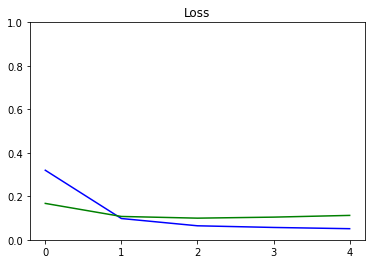

In [ ]:
# plot the progress of loss as training proceeds over number of epochs
def plot_metrics(train_metric, val_metric, metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.plot(train_metric,color='blue',label=metric_name)
    plt.plot(val_metric,color='green',label='val_' + metric_name)

plot_metrics(epochs_train_losses, epochs_val_losses, "Loss", "Loss", ylim=1.0)

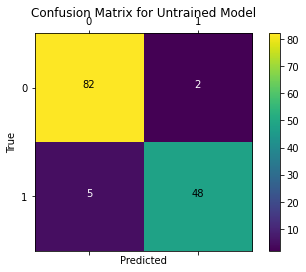

In [ ]:
# plot the confusion matrix to visualize the true values against the values predicted by the model
test_outputs = model(norm_test_X.values)
plot_confusion_matrix(test_Y.values, tf.round(test_outputs), title='Confusion Matrix for Untrained Model')

## Example 5. Introductions to Autographs.

In [ ]:
import tensorflow as tf


@tf.function  # we can use the @tf.function decorator to automatically generate the graph-style code as shown below
def add(a, b):
    return a + b


a = tf.Variable([[1.,2.],[3.,4.]])
b = tf.Variable([[4.,0.],[1.,5.]])
print(tf.add(a, b))

# See what the generated code looks like
print(tf.autograph.to_code(add.python_function))

tf.Tensor(
[[5. 2.]
 [4. 9.]], shape=(2, 2), dtype=float32)
def tf__add(a, b):
    with ag__.FunctionScope('add', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (ag__.ld(a) + ag__.ld(b))
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [ ]:
# simple function that returns the square if the input is greater than zero
@tf.function
def f(x):
    if x>0:
        x = x * x
    return x

print(tf.autograph.to_code(f.python_function))

def tf__f(x):
    with ag__.FunctionScope('f', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def if_body():
            nonlocal x
            x = (ag__.ld(x) * ag__.ld(x))

        def else_body():
            nonlocal x
            pass
        ag__.if_stmt((ag__.ld(x) > 0), if_body, else_body, get_state, set_state, ('x',), 1)
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [ ]:
# Fizzbuzz in autograph
# Fortunately, you can just use @tf.function and then call tf.autograph.to_code !!
@tf.function
def fizzbuzz(max_num):
    counter = 0
    for num in range(max_num):
        if num % 3 == 0 and num % 5 == 0:
            print('FizzBuzz')
        elif num % 3 == 0:
            print('Fizz')
        elif num % 5 == 0:
            print('Buzz')
        else:
            print(num)
        counter += 1
    return counter

print(tf.autograph.to_code(fizzbuzz.python_function))

def tf__fizzbuzz(max_num):
    with ag__.FunctionScope('fizzbuzz', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        counter = 0

        def get_state_3():
            return (counter,)

        def set_state_3(vars_):
            nonlocal counter
            (counter,) = vars_

        def loop_body(itr):
            nonlocal counter
            num = itr

            def get_state_2():
                return ()

            def set_state_2(block_vars):
                pass

            def if_body_2():
                ag__.ld(print)('FizzBuzz')

            def else_body_2():

                def get_state_1():
                    return ()

                def set_state_1(block_vars):
                    pass

                def if_body_1():
                    ag__.ld(print)('Fizz')

                def else_body_1(

In [ ]:
# multiplication and addition function
a = tf.Variable(1.0)
b = tf.Variable(2.0)

@tf.function
def f(x,y):
    a.assign(y * b)
    b.assign_add(x * a)
    return a + b

print(f(1.0, 2.0))

print(tf.autograph.to_code(f.python_function))

tf.Tensor(10.0, shape=(), dtype=float32)
def tf__f(x, y):
    with ag__.FunctionScope('f', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        ag__.converted_call(ag__.ld(a).assign, ((ag__.ld(y) * ag__.ld(b)),), None, fscope)
        ag__.converted_call(ag__.ld(b).assign_add, ((ag__.ld(x) * ag__.ld(a)),), None, fscope)
        try:
            do_return = True
            retval_ = (ag__.ld(a) + ag__.ld(b))
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [ ]:
# function that checks if the sign of a number is positive or not
@tf.function
def sign(x):
    if x > 0:
        return 'Positive'
    else:
        return 'Negative or zero'

print("Sign = {}".format(sign(tf.constant(2))))
print("Sign = {}".format(sign(tf.constant(-2))))

print(tf.autograph.to_code(sign.python_function))

Sign = b'Positive'
Sign = b'Negative or zero'
def tf__sign(x):
    with ag__.FunctionScope('sign', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (do_return, retval_)

        def set_state(vars_):
            nonlocal do_return, retval_
            (do_return, retval_) = vars_

        def if_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = 'Positive'
            except:
                do_return = False
                raise

        def else_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = 'Negative or zero'
            except:
                do_return = False
                raise
        ag__.if_stmt((ag__.ld(x) > 0), if_body, el

In [ ]:
# another function that includes a while loop.
@tf.function
def f(x):
    while tf.reduce_sum(x) > 1:
        tf.print(x)
        x = tf.tanh(x)
    return x

print(tf.autograph.to_code(f.python_function))

def tf__f(x):
    with ag__.FunctionScope('f', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body():
            nonlocal x
            ag__.converted_call(ag__.ld(tf).print, (ag__.ld(x),), None, fscope)
            x = ag__.converted_call(ag__.ld(tf).tanh, (ag__.ld(x),), None, fscope)

        def loop_test():
            return (ag__.converted_call(ag__.ld(tf).reduce_sum, (ag__.ld(x),), None, fscope) > 1)
        ag__.while_stmt(loop_test, loop_body, get_state, set_state, ('x',), {})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [ ]:
# function that uses a for loop and an if statement.
@tf.function
def sum_even(items):
    s = 0
    for c in items:
        if c % 2 > 0:
            continue
        s += c
    return s

print(tf.autograph.to_code(sum_even.python_function))


def tf__sum_even(items):
    with ag__.FunctionScope('sum_even', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        s = 0

        def get_state_2():
            return (s,)

        def set_state_2(vars_):
            nonlocal s
            (s,) = vars_

        def loop_body(itr):
            nonlocal s
            c = itr
            continue_ = False

            def get_state():
                return (continue_,)

            def set_state(vars_):
                nonlocal continue_
                (continue_,) = vars_

            def if_body():
                nonlocal continue_
                continue_ = True

            def else_body():
                nonlocal continue_
                pass
            ag__.if_stmt(((ag__.ld(c) % 2) > 0), if_body, else_body, get_state, set_state, ('continue_',), 1)

           

Print function.

In [ ]:
def f(x):
    print("Traced with", x)

for i in range(5):
    f(2)
    
f(3)

Traced with 2
Traced with 2
Traced with 2
Traced with 2
Traced with 2
Traced with 3


In [ ]:
@tf.function
def f(x):
    print("Traced with", x)

for i in range(5):
    f(2)
    
f(3)

Traced with 2
Traced with 3


In [ ]:
# print .vs tf.print
@tf.function
def f(x):
    print("Traced with", x)
    # added tf.print
    tf.print("Executed with", x)

for i in range(5):
    f(2)
    
f(3)

Traced with 2
Executed with 2
Executed with 2
Executed with 2
Executed with 2
Executed with 2
Traced with 3
Executed with 3


Notice that the traced with statement is only printed once. This is because the Python print statement isn't designed to work within graph or the session that's executed by the graph. It thinks it's only being called once. In contrast, TensorFlow's tf.print, which is graph aware, will print correctly and as you can see, it executed with two runs five times.

Avoid defining variables inside the function.

In [ ]:
def f(x):
    v = tf.Variable(1.0)
    v.assign_add(x)
    return v

print(f(1))

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


In [ ]:
@tf.function
def f(x):
    v = tf.Variable(1.0)
    v.assign_add(x)
    return v

print(f(1))

ValueError: ignored

In [ ]:
# define the variables outside of the decorated function
v = tf.Variable(1.0)

@tf.function
def f(x):
    return v.assign_add(x)

print(f(5))

tf.Tensor(6.0, shape=(), dtype=float32)


## Example 6. Binary Classification with Autograph execution on Horses or Human Dataset.

In this example, we practice on how to train a Keras model on the horses_or_humans dataset with the entire training process performed in graph mode. These steps include:



*   loading batches
*   calculating gradients
*   updating parameters
*   calculating validation accuracy
*   repeating the loop until convergence

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt

Prepare the dataset.

In [ ]:
splits, info = tfds.load('horses_or_humans', as_supervised=True, with_info=True, split=['train[:80%]', 'train[80%:]', 'test'], data_dir='./data')

(train_examples, validation_examples, test_examples) = splits

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

BATCH_SIZE = 32
IMAGE_SIZE = 224

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling data/horses_or_humans/3.0.0.incompleteSKPJH8/horses_or_humans-train.tfrecord*...:   0%|          | 0…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling data/horses_or_humans/3.0.0.incompleteSKPJH8/horses_or_humans-test.tfrecord*...:   0%|          | 0/…

Dataset horses_or_humans downloaded and prepared to ./data/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


Preprocess an image.

In [ ]:
# Create a autograph pre-processing function to resize and normalize an image
@tf.function
def map_fn(img, label):
    image_height = 224
    image_width = 224
    # resize the image
    img = tf.image.resize(img, size=(image_height, image_width))
    # normalize the image
    img /= 255.0
    return img, label

In [ ]:
## TEST CODE:

test_image, test_label = list(train_examples)[0]

test_result = map_fn(test_image, test_label)

print(test_result[0].shape)
print(test_result[1].shape)

del test_image, test_label, test_result

(224, 224, 3)
()


In [ ]:
# Prepare train dataset by using preprocessing with map_fn, shuffling and batching
def prepare_dataset(train_examples, validation_examples, test_examples, num_examples, map_fn, batch_size):
    train_ds = train_examples.map(map_fn).shuffle(buffer_size=num_examples).batch(batch_size)
    valid_ds = validation_examples.map(map_fn).batch(batch_size)
    test_ds = test_examples.map(map_fn).batch(batch_size)
    
    return train_ds, valid_ds, test_ds

In [ ]:
train_ds, valid_ds, test_ds = prepare_dataset(train_examples, validation_examples, test_examples, num_examples, map_fn, BATCH_SIZE)

In [ ]:
## TEST CODE:

test_train_ds = list(train_ds)
print(len(test_train_ds))
print(test_train_ds[0][0].shape)

del test_train_ds

26
(32, 224, 224, 3)


Build and train the model.

In [ ]:
# define the model
MODULE_HANDLE = 'https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'
model = tf.keras.Sequential([
    hub.KerasLayer(MODULE_HANDLE, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23561152  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,565,250
Trainable params: 4,098
Non-trainable params: 23,561,152
_________________________________________________________________


In [ ]:
# define optimizer
def set_adam_optimizer():
    # Define the adam optimizer
    optimizer = tf.keras.optimizers.Adam()
    return optimizer

# define loss function
def set_sparse_cat_crossentropy_loss():
    # Define object oriented metric of Sparse categorical crossentropy for train and val loss
    train_loss = tf.keras.losses.SparseCategoricalCrossentropy()
    val_loss = tf.keras.losses.SparseCategoricalCrossentropy()
    return train_loss, val_loss

# define accuracy function
def set_sparse_cat_crossentropy_accuracy():
    # Define object oriented metric of Sparse categorical accuracy for train and val accuracy
    train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    return train_accuracy, val_accuracy

In [ ]:
# set the optimizer, loss and accuracy
optimizer = set_adam_optimizer()
train_loss, val_loss = set_sparse_cat_crossentropy_loss()
train_accuracy, val_accuracy = set_sparse_cat_crossentropy_accuracy()

In [ ]:
# define the training loop
# this code uses the GPU if available, otherwise uses a CPU
device = '/gpu:0' if tf.config.list_physical_devices('GPU') else '/cpu:0'
EPOCHS = 2

# Custom training step
def train_one_step(model, optimizer, x, y, train_loss, train_accuracy):
    '''
    Trains on a batch of images for one step.
    
    Args:
        model (keras Model) -- image classifier
        optimizer (keras Optimizer) -- optimizer to use during training
        x (Tensor) -- training images
        y (Tensor) -- training labels
        train_loss (keras Loss) -- loss object for training
        train_accuracy (keras Metric) -- accuracy metric for training
    '''
    with tf.GradientTape() as tape:
        # Run the model on input x to get predictions
        predictions = model(x)
        # Compute the training loss using `train_loss`, passing in the true y and the predicted y
        loss = train_loss(y_true=y, y_pred=predictions)

    # Using the tape and loss, compute the gradients on model variables using tape.gradient
    grads = tape.gradient(loss, model.trainable_variables)
    
    # Zip the gradients and model variables, and then apply the result on the optimizer
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Call the train accuracy object on ground truth and predictions
    train_accuracy(y_true=y, y_pred=predictions)
    return loss

In [ ]:
# define the train function

# Decorate this function with tf.function to enable autograph on the training loop
@tf.function
def train(model, optimizer, epochs, device, train_ds, train_loss, train_accuracy, valid_ds, val_loss, val_accuracy):
    '''
    Performs the entire training loop. Prints the loss and accuracy per step and epoch.
    
    Args:
        model (keras Model) -- image classifier
        optimizer (keras Optimizer) -- optimizer to use during training
        epochs (int) -- number of epochs
        train_ds (tf Dataset) -- the train set containing image-label pairs
        train_loss (keras Loss) -- loss function for training
        train_accuracy (keras Metric) -- accuracy metric for training
        valid_ds (Tensor) -- the val set containing image-label pairs
        val_loss (keras Loss) -- loss object for validation
        val_accuracy (keras Metric) -- accuracy metric for validation
    '''
    step = 0
    loss = 0.0
    for epoch in range(epochs):
        for x, y in train_ds:
            # training step number increments at each iteration
            step += 1
            with tf.device(device_name=device):
                # Run one training step by passing appropriate model parameters
                # required by the function and finally get the loss to report the results
                loss = train_one_step(model, optimizer, x, y, train_loss, train_accuracy)
            # Use tf.print to report your results.
            # Print the training step number, loss and accuracy
            tf.print('Step', step, 
                   ': train loss', loss, 
                   '; train accuracy', train_accuracy.result())

        with tf.device(device_name=device):
            for x, y in valid_ds:
                # Call the model on the batches of inputs x and get the predictions
                y_pred = model(x)
                loss = val_loss(y, y_pred)
                val_accuracy(y, y_pred)
        
        # Print the validation loss and accuracy
        tf.print('val loss', loss, '; val accuracy', val_accuracy.result())
        train_accuracy.reset_states()
        val_accuracy.reset_states()

In [ ]:
# train the model
train(model, optimizer, EPOCHS, device, train_ds, train_loss, train_accuracy, valid_ds, val_loss, val_accuracy)

Step 1 : train loss 1.51775181 ; train accuracy 0.53125
Step 2 : train loss 0.735565245 ; train accuracy 0.53125
Step 3 : train loss 0.61300838 ; train accuracy 0.541666687
Step 4 : train loss 0.656733274 ; train accuracy 0.5703125
Step 5 : train loss 0.653514683 ; train accuracy 0.59375
Step 6 : train loss 0.603973806 ; train accuracy 0.604166687
Step 7 : train loss 0.312916636 ; train accuracy 0.642857134
Step 8 : train loss 0.253970236 ; train accuracy 0.68359375
Step 9 : train loss 0.133483946 ; train accuracy 0.715277791
Step 10 : train loss 0.123242572 ; train accuracy 0.74375
Step 11 : train loss 0.0768191218 ; train accuracy 0.767045438
Step 12 : train loss 0.0773039311 ; train accuracy 0.786458313
Step 13 : train loss 0.0519933626 ; train accuracy 0.802884638
Step 14 : train loss 0.0411920473 ; train accuracy 0.816964269
Step 15 : train loss 0.0521394797 ; train accuracy 0.829166651
Step 16 : train loss 0.0515042394 ; train accuracy 0.83984375
Step 17 : train loss 0.050954476 

In [ ]:
# evaluate on test images
test_imgs = []
test_labels = []

predictions = []
with tf.device(device_name=device):
    for images, labels in test_ds:
        preds = model(images)
        preds = preds.numpy()
        predictions.extend(preds)

        test_imgs.extend(images.numpy())
        test_labels.extend(labels.numpy())

In [ ]:
# Utilities for plotting

class_names = ['horse', 'human']

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    img = np.squeeze(img)

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    # green-colored annotations will mark correct predictions. red otherwise.
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    # print the true label first
    print(true_label)
  
    # show the image and overlay the prediction
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

Visualize outputs.

1
0


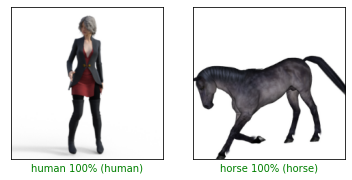

In [ ]:
# Plot the result of a single image 

# you can modify the index value here from 0 to 255 to test different images
index1, index2 = 9, 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index1, predictions, test_labels, test_imgs)
plt.subplot(1,2,2)
plot_image(index2, predictions, test_labels, test_imgs)
plt.show()

## Example 7. Distributed training.

As your models get bigger and more complex, it may become infeasible to train them on a single CPU, GPU or even TPU. So you might need to figure out ways to distribute the training across multiple ones. Distributed training in TensorFlow is built around data parallelism. Where we replicate the same model on multiple devices and run different slices of the input data on them. At the heart of all distributed training in TensorFlow is the tf.distribute.strategy class. This class supports different distribution strategies on high level APIs in TensorFlow such as Keras.

When discussing distribution strategy, there are some new concepts and terms. That you might not be immediately familiar with. So let's learn about these now.
Play video starting at :2:51 and follow transcript2:51
We'll use the term device to refer to any kind of machine that trains machine learning models. This could be CPU or an accelerated like a GPU or TPU. It is possible to have multiple devices on a single computer. So for example, the machine could have a single CPU and two GPUs. There by having three total devices available for pre-processing and model training. During training, the copies of the models variables are placed on several devices. This copy is often referred to as a replica. A worker is software running on a device that's dedicated to training the replica that's on that device. And even though some variables in the replicas are trained independently of the other replicas. There are some variables that you want to be in sync across all devices. The variables within these models that we want to keep in sync across all of the devices we'll call mirrored variables.

Classifying Strategies:



*   Hardware platforms: 1) single machine multi device or 2) multi machine.
*   Training: 1) sychronous(all-reduce) or 2) asychronous(parameter server).



TensorFlow supports a number of strategies to help you train using the above scenarios: MirroredStrategy, MultiWorkerMirroredStrategy, ParameterServerStrategy, DefaultStrategy, OneDeviceStrategy, TPUStrategy, CentralStorageStrategy.

1. Basic Mirrored Strategy.

There's really two main places where you change your code to establish a merit strategy. One is in your model declaration and the others in your data preprocessing.

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()
import os

In [ ]:
# Load the dataset we'll use for this lab
datasets, info = tfds.load(name='mnist', with_info=True, as_supervised=True, data_dir='./data')

mnist_train, mnist_test = datasets['train'], datasets['test']

Dataset mnist downloaded and prepared to ./data/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# 1st step: Define the strategy to use and print the number of devices found
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [ ]:
# Get the number of examples in the train and test sets
num_train_examples = info.splits['train'].num_examples
num_test_examples = info.splits['test'].num_examples

BUFFER_SIZE = 10000

# 2nd step: change on data preprocessing
BATCH_SIZE_PER_REPLICA = 64   # if you have two GPUs you could do a bigger batch a 128 because it's been split across them if you do an three, etc.
# Use for Mirrored Strategy
BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync
# Use for No Strategy
# BATCH_SIZE = BATCH_SIZE_PER_REPLICA * 1

In [ ]:
# Function for normalizing the image
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255

    return image, label

In [ ]:
# Set up the train and eval data set
train_dataset = mnist_train.map(scale).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
eval_dataset = mnist_test.map(scale).batch(BATCH_SIZE)

In [ ]:
# define the model
# Use for Mirrored Strategy -- comment out `with strategy.scope():` and deindent for no strategy
with strategy.scope():
    model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(10)
    ])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model.fit(train_dataset, epochs=12)

Epoch 1/12
938/938 [==============================] - 33s 19ms/step - loss: 0.2053 - accuracy: 0.9391
Epoch 2/12
938/938 [==============================] - 6s 7ms/step - loss: 0.0661 - accuracy: 0.9800
Epoch 3/12
938/938 [==============================] - 5s 6ms/step - loss: 0.0465 - accuracy: 0.9862
Epoch 4/12
938/938 [==============================] - 6s 7ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 5/12
938/938 [==============================] - 5s 6ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 6/12
938/938 [==============================] - 7s 8ms/step - loss: 0.0197 - accuracy: 0.9941
Epoch 7/12
938/938 [==============================] - 5s 5ms/step - loss: 0.0157 - accuracy: 0.9951
Epoch 8/12
938/938 [==============================] - 8s 8ms/step - loss: 0.0119 - accuracy: 0.9963
Epoch 9/12
938/938 [==============================] - 6s 7ms/step - loss: 0.0095 - accuracy: 0.9971
Epoch 10/12
938/938 [==============================] - 8s 9ms/step - loss: 0.0077 - accuracy: 0.99

Here, we have only one device to train on, so we can't see how mirrored strategy's training occurs.

The mirrored strategy will create one replica for every GPU device, and all the trainable variables are copied across these replicates. Thereby, it treats them as mirrored variables. This means that after each forward pass in all of the replicas and the models, the variables are synced, so that they are the same across all devices and all replicas of the model. Variables that are created in this strategy are treated as mirrored variables.

2. Multi-GPU Mirrored Strategy.

In [ ]:
import tensorflow as tf
import numpy as np
import os

Setup Distribution Strategy.

In [ ]:
# Note that it generally has a minimum of 8 cores, but if your GPU has
# less, you need to set this. In this case one of my GPUs has 4 cores
os.environ["TF_MIN_GPU_MULTIPROCESSOR_COUNT"] = "4"

# If the list of devices is not specified in the
# `tf.distribute.MirroredStrategy` constructor, it will be auto-detected.
# If you have *different* GPUs in your system, you probably have to set up cross_device_ops like this
strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
print ('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


Prepare the Data.

In [ ]:
# Get the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Adding a dimension to the array -> new shape == (28, 28, 1)
# We are doing this because the first layer in our model is a convolutional
# layer and it requires a 4D input (batch_size, height, width, channels).
# batch_size dimension will be added later on.
train_images = train_images[..., None]
test_images = test_images[..., None]

# Normalize the images to [0, 1] range.
train_images = train_images / np.float32(255)
test_images = test_images / np.float32(255)

# Batch the input data
BUFFER_SIZE = len(train_images)
BATCH_SIZE_PER_REPLICA = 64
GLOBAL_BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

# Create Datasets from the batches
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(BUFFER_SIZE).batch(GLOBAL_BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(GLOBAL_BATCH_SIZE)

# Create Distributed Datasets from the datasets
train_dist_dataset = strategy.experimental_distribute_dataset(train_dataset)
test_dist_dataset = strategy.experimental_distribute_dataset(test_dataset)

4422102/4422102 [==============================] - 0s 0us/step


Define the Model.

In [ ]:
# Create the model architecture
def create_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(10)
    ])
  return model

Configure custom training.

In [ ]:
with strategy.scope():
    # We will use sparse categorical crossentropy as always. But, instead of having the loss function
    # manage the map reduce across GPUs for us, we'll do it ourselves with a simple algorithm.
    # Remember -- the map reduce is how the losses get aggregated
    # Set reduction to `none` so we can do the reduction afterwards and divide byglobal batch size.
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)

    def compute_loss(labels, predictions):
        # Compute Loss uses the loss object to compute the loss
        # Notice that per_example_loss will have an entry per GPU
        # so in this case there'll be 2 -- i.e. the loss for each replica
        per_example_loss = loss_object(labels, predictions)
        # You can print it to see it -- you'll get output like this:
        # Tensor("sparse_categorical_crossentropy/weighted_loss/Mul:0", shape=(48,), dtype=float32, device=/job:localhost/replica:0/task:0/device:GPU:0)
        # Tensor("replica_1/sparse_categorical_crossentropy/weighted_loss/Mul:0", shape=(48,), dtype=float32, device=/job:localhost/replica:0/task:0/device:GPU:1)
        # Note in particular that replica_0 isn't named in the weighted_loss -- the first is unnamed, the second is replica_1 etc
        print(per_example_loss)
        return tf.nn.compute_average_loss(per_example_loss, global_batch_size=GLOBAL_BATCH_SIZE)

    # We'll just reduce by getting the average of the losses
    test_loss = tf.keras.metrics.Mean(name='test_loss')

    # Accuracy on train and test will be SparseCategoricalAccuracy
    train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
    test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

    # Optimizer will be Adam
    optimizer = tf.keras.optimizers.Adam()

    # Create the model within the scope
    model = create_model()

Train and Test Steps Functions.

In [ ]:
# `run` replicates the provided computation and runs it
# with the distributed input.
@tf.function
def distributed_train_step(dataset_inputs):
  per_replica_losses = strategy.run(train_step, args=(dataset_inputs,))
  #tf.print(per_replica_losses.values)
  return strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses, axis=None)

def train_step(inputs):
  images, labels = inputs
  with tf.GradientTape() as tape:
    predictions = model(images, training=True)
    loss = compute_loss(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_accuracy.update_state(labels, predictions)
  return loss

#######################
# Test Steps Functions
#######################
@tf.function
def distributed_test_step(dataset_inputs):
  return strategy.run(test_step, args=(dataset_inputs,))

def test_step(inputs):
  images, labels = inputs

  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss.update_state(t_loss)
  test_accuracy.update_state(labels, predictions)

Training Loop.

In [ ]:
EPOCHS = 10
for epoch in range(EPOCHS):
  # Do Training
  total_loss = 0.0
  num_batches = 0
  for batch in train_dist_dataset:
    total_loss += distributed_train_step(batch)
    num_batches += 1
  train_loss = total_loss / num_batches

  # Do Testing
  for batch in test_dist_dataset:
    distributed_test_step(batch)

  template = ("Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, " "Test Accuracy: {}")

  print (template.format(epoch+1, train_loss, train_accuracy.result()*100, test_loss.result(), test_accuracy.result()*100))

  test_loss.reset_states()
  train_accuracy.reset_states()
  test_accuracy.reset_states()

Tensor("sparse_categorical_crossentropy/weighted_loss/Mul:0", shape=(64,), dtype=float32, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("sparse_categorical_crossentropy/weighted_loss/Mul:0", shape=(64,), dtype=float32, device=/job:localhost/replica:0/task:0/device:GPU:0)
Tensor("sparse_categorical_crossentropy/weighted_loss/Mul:0", shape=(32,), dtype=float32, device=/job:localhost/replica:0/task:0/device:GPU:0)
Epoch 1, Loss: 0.5088793635368347, Accuracy: 81.43000030517578, Test Loss: 0.39580920338630676, Test Accuracy: 85.79999542236328
Epoch 2, Loss: 0.33905965089797974, Accuracy: 87.64167022705078, Test Loss: 0.33110421895980835, Test Accuracy: 88.41999816894531
Epoch 3, Loss: 0.28742003440856934, Accuracy: 89.53666687011719, Test Loss: 0.2952442765235901, Test Accuracy: 89.27999877929688
Epoch 4, Loss: 0.2586081922054291, Accuracy: 90.53833770751953, Test Loss: 0.29321348667144775, Test Accuracy: 89.20999908447266
Epoch 5, Loss: 0.23340320587158203, Accuracy: 91.41333

Note that Colab only offers a single GPU. It will be hard for you to see the parallelism.

3. TPU Strategy.

Why would I want to use a TPU? The bottom line for this is ultimately that TPUs are chips that are optimized for machine learning. If you have large inexpensive models that can be orders of magnitude cheaper to use and training. Colab supports TPUs so that you can experiment with them.

In [1]:
import os
import random
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print("TensorFlow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
TensorFlow version 2.9.2


Set up TPUs and initialize TPU Strategy.

In [2]:
# Ensure to change the runtime type to TPU in Runtime -> Change runtime type -> TPU

# Detect hardware
try:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address) # TPU detection
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  strategy = tf.distribute.experimental.TPUStrategy(tpu) 
  # Going back and forth between TPU and host is expensive.
  # Better to run 128 batches on the TPU before reporting back.
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])  
  print("Number of accelerators: ", strategy.num_replicas_in_sync)
except ValueError:
  print('TPU failed to initialize.')

Running on TPU  ['10.75.107.10:8470']
Number of accelerators:  8


Download the Data from Google Cloud Storage.

In [3]:
SIZE = 224 #@param ["192", "224", "331", "512"] {type:"raw"}
IMAGE_SIZE = [SIZE, SIZE]   

GCS_PATTERN = 'gs://flowers-public/tfrecords-jpeg-{}x{}/*.tfrec'.format(IMAGE_SIZE[0], IMAGE_SIZE[1])

BATCH_SIZE = 128  # On TPU in Keras, this is the per-core batch size. The global batch size is 8x this.

VALIDATION_SPLIT = 0.2
CLASSES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'] # do not change, maps to the labels in the data (folder names)

# splitting data files between training and validation
filenames = tf.io.gfile.glob(GCS_PATTERN)
random.shuffle(filenames)

split = int(len(filenames) * VALIDATION_SPLIT)
training_filenames = filenames[split:]
validation_filenames = filenames[:split]
print("Pattern matches {} data files. Splitting dataset into {} training files and {} validation files".format(len(filenames), len(training_filenames), len(validation_filenames)))

validation_steps = int(3670 // len(filenames) * len(validation_filenames)) // BATCH_SIZE
steps_per_epoch = int(3670 // len(filenames) * len(training_filenames)) // BATCH_SIZE
print("With a batch size of {}, there will be {} batches per training epoch and {} batch(es) per validation run.".format(BATCH_SIZE, steps_per_epoch, validation_steps))

Pattern matches 16 data files. Splitting dataset into 13 training files and 3 validation files
With a batch size of 128, there will be 23 batches per training epoch and 5 batch(es) per validation run.


Create a dataset from the files: load_dataset takes the filenames and turns them into a tf.data.Dataset, read_tfrecord parses out a tf record into the image, class and a one-hot-encoded version of the class, batch the data into training and validation sets with helper functions.

In [4]:
def read_tfrecord(example):
    features = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means scalar
        "one_hot_class": tf.io.VarLenFeature(tf.float32),
    }
    example = tf.io.parse_single_example(example, features)
    image = example['image']
    class_label = example['class']
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    class_label = tf.cast(class_label, tf.int32)
    return image, class_label

def load_dataset(filenames):
  # read from TFRecords. For optimal performance, use "interleave(tf.data.TFRecordDataset, ...)"
  # to read from multiple TFRecord files at once and set the option experimental_deterministic = False
  # to allow order-altering optimizations.

  option_no_order = tf.data.Options()
  option_no_order.experimental_deterministic = False

  dataset = tf.data.Dataset.from_tensor_slices(filenames)
  dataset = dataset.with_options(option_no_order)
  dataset = dataset.interleave(tf.data.TFRecordDataset, cycle_length=16, num_parallel_calls=AUTO) # faster
  dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTO)
  return dataset

def get_batched_dataset(filenames):
  dataset = load_dataset(filenames)
  dataset = dataset.shuffle(2048)
  dataset = dataset.batch(BATCH_SIZE, drop_remainder=False) # drop_remainder will be needed on TPU
  dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
  return dataset

def get_training_dataset():
  dataset = get_batched_dataset(training_filenames)
  dataset = strategy.experimental_distribute_dataset(dataset)
  return dataset

def get_validation_dataset():
  dataset = get_batched_dataset(validation_filenames)
  dataset = strategy.experimental_distribute_dataset(dataset)
  return dataset

Define the Model and training parameters.

In [5]:
class MyModel(tf.keras.Model):
  def __init__(self, classes):
    super(MyModel, self).__init__()
    self._conv1a = tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu')
    self._conv1b = tf.keras.layers.Conv2D(kernel_size=3, filters=30, padding='same', activation='relu')
    self._maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=2)
    
    self._conv2a = tf.keras.layers.Conv2D(kernel_size=3, filters=60, padding='same', activation='relu')
    self._maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=2)
    
    self._conv3a = tf.keras.layers.Conv2D(kernel_size=3, filters=90, padding='same', activation='relu')
    self._maxpool3 = tf.keras.layers.MaxPooling2D(pool_size=2)
    
    self._conv4a = tf.keras.layers.Conv2D(kernel_size=3, filters=110, padding='same', activation='relu')
    self._maxpool4 = tf.keras.layers.MaxPooling2D(pool_size=2)
    
    self._conv5a = tf.keras.layers.Conv2D(kernel_size=3, filters=130, padding='same', activation='relu')
    self._conv5b = tf.keras.layers.Conv2D(kernel_size=3, filters=40, padding='same', activation='relu')
    
    self._pooling = tf.keras.layers.GlobalAveragePooling2D()
    self._classifier = tf.keras.layers.Dense(classes, activation='softmax')

  def call(self, inputs):
    x = self._conv1a(inputs)
    x = self._conv1b(x)
    x = self._maxpool1(x)

    x = self._conv2a(x)
    x = self._maxpool2(x)

    x = self._conv3a(x)
    x = self._maxpool3(x)

    x = self._conv4a(x)
    x = self._maxpool4(x)

    x = self._conv5a(x)
    x = self._conv5b(x)

    x = self._pooling(x)
    x = self._classifier(x)
    return x

In [6]:
with strategy.scope():
  model = MyModel(classes=len(CLASSES))
  # Set reduction to `none` so we can do the reduction afterwards and divide by
  # global batch size.
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
      reduction=tf.keras.losses.Reduction.NONE)

  def compute_loss(labels, predictions):
    per_example_loss = loss_object(labels, predictions)
    return tf.nn.compute_average_loss(per_example_loss, global_batch_size=BATCH_SIZE * strategy.num_replicas_in_sync)

  test_loss = tf.keras.metrics.Mean(name='test_loss')

  train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
      name='train_accuracy')
  test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
      name='test_accuracy')
  
  optimizer = tf.keras.optimizers.Adam()

  @tf.function
  def distributed_train_step(dataset_inputs):
    per_replica_losses = strategy.run(train_step,args=(dataset_inputs,))
    print(per_replica_losses)
    return strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses,
                           axis=None)
 
  @tf.function
  def distributed_test_step(dataset_inputs):
    strategy.run(test_step, args=(dataset_inputs,))


  def train_step(inputs):
    images, labels = inputs

    with tf.GradientTape() as tape:
      predictions = model(images)
      loss = compute_loss(labels, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_accuracy.update_state(labels, predictions)

    return loss 

  def test_step(inputs):
    images, labels = inputs

    predictions = model(images)
    loss = loss_object(labels, predictions)

    test_loss.update_state(loss)
    test_accuracy.update_state(labels, predictions)

In [7]:
EPOCHS = 40
with strategy.scope():
  for epoch in range(EPOCHS):
    # TRAINING LOOP
    total_loss = 0.0
    num_batches = 0
    for x in get_training_dataset():
      total_loss += distributed_train_step(x)
      num_batches += 1
    train_loss = total_loss / num_batches

    # TESTING LOOP
    for x in get_validation_dataset():
      distributed_test_step(x)

    template = ("Epoch {}, Loss: {:.2f}, Accuracy: {:.2f}, Test Loss: {:.2f}, "
                "Test Accuracy: {:.2f}")
    print (template.format(epoch+1, train_loss,
                           train_accuracy.result()*100, test_loss.result() / strategy.num_replicas_in_sync,
                           test_accuracy.result()*100))

    test_loss.reset_states()
    train_accuracy.reset_states()
    test_accuracy.reset_states()

PerReplica:{
  0: Tensor("output_0_shard_0:0", shape=(), dtype=float32),
  1: Tensor("output_0_shard_1:0", shape=(), dtype=float32),
  2: Tensor("output_0_shard_2:0", shape=(), dtype=float32),
  3: Tensor("output_0_shard_3:0", shape=(), dtype=float32),
  4: Tensor("output_0_shard_4:0", shape=(), dtype=float32),
  5: Tensor("output_0_shard_5:0", shape=(), dtype=float32),
  6: Tensor("output_0_shard_6:0", shape=(), dtype=float32),
  7: Tensor("output_0_shard_7:0", shape=(), dtype=float32)
}
PerReplica:{
  0: Tensor("output_0_shard_0:0", shape=(), dtype=float32),
  1: Tensor("output_0_shard_1:0", shape=(), dtype=float32),
  2: Tensor("output_0_shard_2:0", shape=(), dtype=float32),
  3: Tensor("output_0_shard_3:0", shape=(), dtype=float32),
  4: Tensor("output_0_shard_4:0", shape=(), dtype=float32),
  5: Tensor("output_0_shard_5:0", shape=(), dtype=float32),
  6: Tensor("output_0_shard_6:0", shape=(), dtype=float32),
  7: Tensor("output_0_shard_7:0", shape=(), dtype=float32)
}


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


PerReplica:{
  0: Tensor("output_0_shard_0:0", shape=(), dtype=float32),
  1: Tensor("output_0_shard_1:0", shape=(), dtype=float32),
  2: Tensor("output_0_shard_2:0", shape=(), dtype=float32),
  3: Tensor("output_0_shard_3:0", shape=(), dtype=float32),
  4: Tensor("output_0_shard_4:0", shape=(), dtype=float32),
  5: Tensor("output_0_shard_5:0", shape=(), dtype=float32),
  6: Tensor("output_0_shard_6:0", shape=(), dtype=float32),
  7: Tensor("output_0_shard_7:0", shape=(), dtype=float32)
}


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 1, Loss: 0.17, Accuracy: 34.93, Test Loss: 0.16, Test Accuracy: 41.45


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 2, Loss: 0.15, Accuracy: 46.85, Test Loss: 0.15, Test Accuracy: 52.61


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 3, Loss: 0.14, Accuracy: 49.03, Test Loss: 0.16, Test Accuracy: 43.77


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 4, Loss: 0.13, Accuracy: 52.18, Test Loss: 0.14, Test Accuracy: 53.77


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 5, Loss: 0.13, Accuracy: 56.41, Test Loss: 0.15, Test Accuracy: 53.91


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 6, Loss: 0.13, Accuracy: 55.17, Test Loss: 0.13, Test Accuracy: 56.23


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 7, Loss: 0.12, Accuracy: 58.89, Test Loss: 0.15, Test Accuracy: 48.26


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 8, Loss: 0.12, Accuracy: 58.62, Test Loss: 0.13, Test Accuracy: 60.87


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 9, Loss: 0.11, Accuracy: 62.72, Test Loss: 0.12, Test Accuracy: 62.90


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 10, Loss: 0.11, Accuracy: 64.56, Test Loss: 0.12, Test Accuracy: 64.93


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 11, Loss: 0.10, Accuracy: 66.85, Test Loss: 0.11, Test Accuracy: 64.93


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 12, Loss: 0.10, Accuracy: 67.45, Test Loss: 0.11, Test Accuracy: 65.36


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 13, Loss: 0.10, Accuracy: 68.36, Test Loss: 0.11, Test Accuracy: 65.51


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 14, Loss: 0.09, Accuracy: 70.07, Test Loss: 0.11, Test Accuracy: 67.10


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 15, Loss: 0.10, Accuracy: 68.22, Test Loss: 0.11, Test Accuracy: 64.64


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 16, Loss: 0.09, Accuracy: 67.82, Test Loss: 0.11, Test Accuracy: 66.38


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 17, Loss: 0.09, Accuracy: 70.13, Test Loss: 0.11, Test Accuracy: 69.13


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 18, Loss: 0.09, Accuracy: 70.47, Test Loss: 0.12, Test Accuracy: 62.46


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 19, Loss: 0.09, Accuracy: 69.66, Test Loss: 0.11, Test Accuracy: 68.26


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 20, Loss: 0.08, Accuracy: 72.62, Test Loss: 0.10, Test Accuracy: 74.06


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 21, Loss: 0.08, Accuracy: 74.50, Test Loss: 0.10, Test Accuracy: 72.61


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 22, Loss: 0.08, Accuracy: 74.87, Test Loss: 0.10, Test Accuracy: 72.03


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 23, Loss: 0.08, Accuracy: 75.87, Test Loss: 0.09, Test Accuracy: 72.90


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 24, Loss: 0.08, Accuracy: 76.04, Test Loss: 0.09, Test Accuracy: 70.87


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 25, Loss: 0.07, Accuracy: 77.75, Test Loss: 0.10, Test Accuracy: 71.74


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 26, Loss: 0.07, Accuracy: 78.89, Test Loss: 0.09, Test Accuracy: 75.65


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 27, Loss: 0.07, Accuracy: 78.56, Test Loss: 0.10, Test Accuracy: 73.62


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 28, Loss: 0.07, Accuracy: 77.58, Test Loss: 0.10, Test Accuracy: 73.91


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 29, Loss: 0.07, Accuracy: 78.29, Test Loss: 0.09, Test Accuracy: 75.94


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 30, Loss: 0.06, Accuracy: 80.27, Test Loss: 0.09, Test Accuracy: 75.80


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 31, Loss: 0.06, Accuracy: 81.81, Test Loss: 0.10, Test Accuracy: 71.01


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 32, Loss: 0.06, Accuracy: 79.90, Test Loss: 0.09, Test Accuracy: 75.94


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 33, Loss: 0.06, Accuracy: 81.74, Test Loss: 0.09, Test Accuracy: 76.09


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 34, Loss: 0.06, Accuracy: 83.02, Test Loss: 0.09, Test Accuracy: 77.39


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 35, Loss: 0.05, Accuracy: 84.90, Test Loss: 0.08, Test Accuracy: 78.99


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 36, Loss: 0.05, Accuracy: 84.83, Test Loss: 0.09, Test Accuracy: 76.09


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 37, Loss: 0.05, Accuracy: 84.77, Test Loss: 0.09, Test Accuracy: 77.39


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 38, Loss: 0.05, Accuracy: 85.74, Test Loss: 0.08, Test Accuracy: 78.99


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 39, Loss: 0.05, Accuracy: 85.74, Test Loss: 0.09, Test Accuracy: 76.81


Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence
Exception ignored in: <function Executor.__del__ at 0x7fae9521caf0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


Epoch 40, Loss: 0.05, Accuracy: 84.56, Test Loss: 0.08, Test Accuracy: 78.70


Predictions.

In [8]:
#@title display utilities [RUN ME]
import matplotlib.pyplot as plt

def dataset_to_numpy_util(dataset, N):
  dataset = dataset.batch(N)
  
  if tf.executing_eagerly():
    # In eager mode, iterate in the Datset directly.
    for images, labels in dataset:
      numpy_images = images.numpy()
      numpy_labels = labels.numpy()
      break;
      
  else: # In non-eager mode, must get the TF note that 
        # yields the nextitem and run it in a tf.Session.
    get_next_item = dataset.make_one_shot_iterator().get_next()
    with tf.Session() as ses:
      numpy_images, numpy_labels = ses.run(get_next_item)

  return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
  label = np.argmax(label, axis=-1)  # one-hot to class number
  # correct_label = np.argmax(correct_label, axis=-1) # one-hot to class number
  correct = (label == correct_label)
  return "{} [{}{}{}]".format(CLASSES[label], str(correct), ', shoud be ' if not correct else '',
                              CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image)
    plt.title(title, fontsize=16, color='red' if red else 'black')
    return subplot+1
  
def display_9_images_from_dataset(dataset):
  subplot=331
  plt.figure(figsize=(13,13))
  images, labels = dataset_to_numpy_util(dataset, 9)
  for i, image in enumerate(images):
    title = CLASSES[np.argmax(labels[i], axis=-1)]
    subplot = display_one_flower(image, title, subplot)
    if i >= 8:
      break;
              
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()
  
def display_9_images_with_predictions(images, predictions, labels):
  subplot=331
  plt.figure(figsize=(13,13))
  for i, image in enumerate(images):
    title, correct = title_from_label_and_target(predictions[i], labels[i])
    subplot = display_one_flower(image, title, subplot, not correct)
    if i >= 8:
      break;
              
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()
  
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

In [9]:
inference_model = model

In [10]:
some_flowers, some_labels = dataset_to_numpy_util(load_dataset(validation_filenames), 8*20)

['sunflowers', 'sunflowers', 'tulips', 'tulips', 'sunflowers', 'daisy', 'roses', 'sunflowers', 'tulips', 'daisy', 'tulips', 'daisy', 'roses', 'roses', 'dandelion', 'tulips', 'tulips', 'tulips', 'dandelion', 'daisy', 'roses', 'sunflowers', 'dandelion', 'sunflowers', 'dandelion', 'sunflowers', 'roses', 'daisy', 'dandelion', 'tulips', 'daisy', 'sunflowers', 'dandelion', 'sunflowers', 'sunflowers', 'roses', 'dandelion', 'tulips', 'tulips', 'daisy', 'sunflowers', 'tulips', 'dandelion', 'roses', 'roses', 'daisy', 'daisy', 'daisy', 'sunflowers', 'sunflowers', 'tulips', 'daisy', 'daisy', 'dandelion', 'roses', 'tulips', 'sunflowers', 'sunflowers', 'tulips', 'dandelion', 'roses', 'roses', 'daisy', 'sunflowers', 'daisy', 'daisy', 'dandelion', 'sunflowers', 'roses', 'dandelion', 'daisy', 'dandelion', 'tulips', 'dandelion', 'roses', 'sunflowers', 'sunflowers', 'sunflowers', 'daisy', 'dandelion', 'roses', 'roses', 'daisy', 'roses', 'tulips', 'sunflowers', 'tulips', 'dandelion', 'daisy', 'daisy', 'da

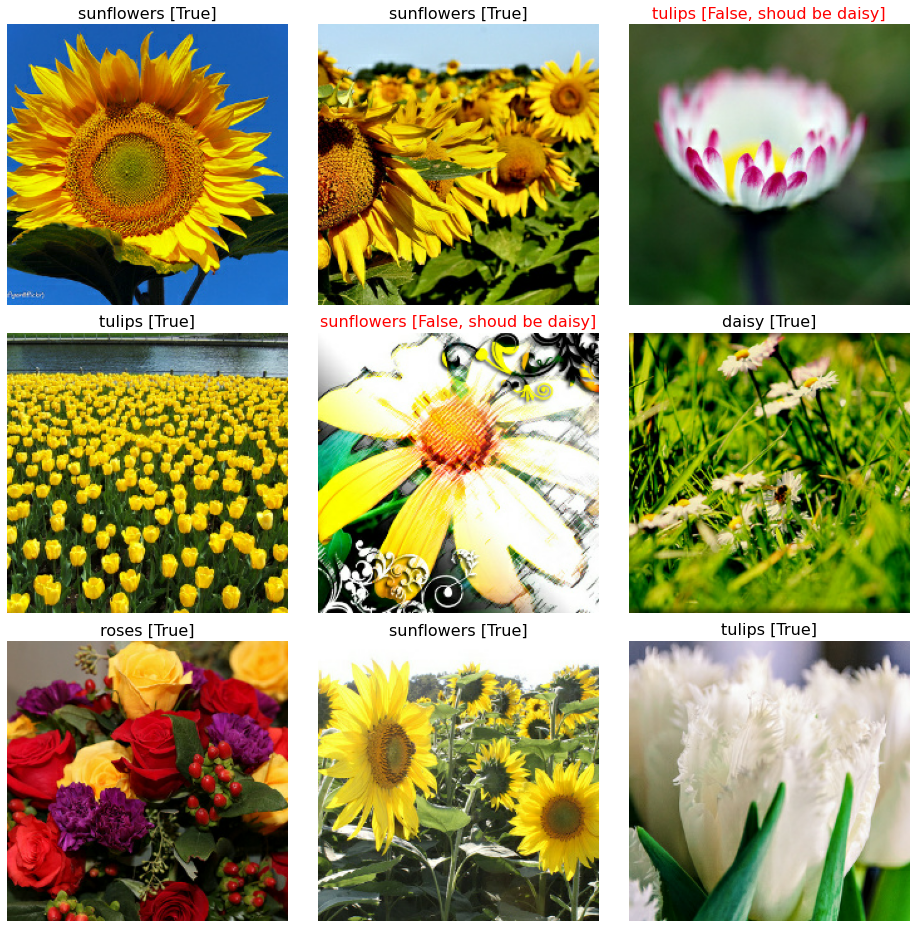

In [11]:
import numpy as np
# randomize the input so that you can execute multiple times to change results
permutation = np.random.permutation(8*20)
some_flowers, some_labels = (some_flowers[permutation], some_labels[permutation])

predictions = inference_model(some_flowers)

print(np.array(CLASSES)[np.argmax(predictions, axis=-1)].tolist())

display_9_images_with_predictions(some_flowers, predictions, some_labels)

4. Multi-worker Mirrored Strategy: https://www.tensorflow.org/tutorials/distribute/multi_worker_with_keras.

## Example 8. Custom training with tf.distribute.Strategy on Oxford Flowers 102 Dataset.

Imports.

In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_hub as hub

# Helper libraries
import numpy as np
import os
from tqdm import tqdm

Download the dataset.

In [19]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

splits = ['train[:80%]', 'train[80%:90%]', 'train[90%:]']

(train_examples, validation_examples, test_examples), info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True, split = splits, data_dir='data/')

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

Create a strategy to distribute the variables and the graph
How does tf.distribute.MirroredStrategy strategy work?

-All the variables and the model graph are replicated on the replicas.

-Input is evenly distributed across the replicas.

-Each replica calculates the loss and gradients for the input it received.

-The gradients are synced across all the replicas by summing them.

-After the sync, the same update is made to the copies of the variables on each replica.

In [20]:
# If the list of devices is not specified in the
# `tf.distribute.MirroredStrategy` constructor, it will be auto-detected.
strategy = tf.distribute.MirroredStrategy()

In [21]:
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


Setup input pipeline: set some constants, including the buffer size, number of epochs, and the image size.

In [22]:
BUFFER_SIZE = num_examples
EPOCHS = 10
pixels = 224
MODULE_HANDLE = 'https://tfhub.dev/tensorflow/resnet_50/classification/1'
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {}".format(MODULE_HANDLE, IMAGE_SIZE))

Using https://tfhub.dev/tensorflow/resnet_50/classification/1 with input size (224, 224)


In [23]:
# function to format the image (resizes the image and scales the pixel values to range from [0,1
def format_image(image, label):
    image = tf.image.resize(image, IMAGE_SIZE) / 255.0
    return  image, label

Set the global batch size (please complete this section)
Given the batch size per replica and the strategy, set the global batch size.

The global batch size is the batch size per replica times the number of replicas in the strategy.
You'll want to use the num_replicas_in_sync stored in the strategy.

In [24]:
def set_global_batch_size(batch_size_per_replica, strategy):
    '''
    Args:
        batch_size_per_replica (int) - batch size per replica
        strategy (tf.distribute.Strategy) - distribution strategy
    '''
    
    # set the global batch size
    global_batch_size = batch_size_per_replica * strategy.num_replicas_in_sync
    
    return global_batch_size

In [25]:
# Set the GLOBAL_BATCH_SIZE with the function that you just defined
BATCH_SIZE_PER_REPLICA = 64
GLOBAL_BATCH_SIZE = set_global_batch_size(BATCH_SIZE_PER_REPLICA, strategy)

print(GLOBAL_BATCH_SIZE)

64


In [26]:
# Create the datasets using the global batch size and distribute the batches for training, validation and test batches

train_batches = train_examples.shuffle(num_examples // 4).map(format_image).batch(BATCH_SIZE_PER_REPLICA).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE_PER_REPLICA).prefetch(1)
test_batches = test_examples.map(format_image).batch(1)

Define the distributed datasets: create the distributed datasets using experimental_distribute_dataset() of the Strategy class and pass in the training batches. Do the same for the validation batches and test batches.

In [27]:
def distribute_datasets(strategy, train_batches, validation_batches, test_batches):
    
    train_dist_dataset = strategy.experimental_distribute_dataset(train_batches)
    val_dist_dataset = strategy.experimental_distribute_dataset(validation_batches)
    test_dist_dataset = strategy.experimental_distribute_dataset(test_batches)
    
    return train_dist_dataset, val_dist_dataset, test_dist_dataset

In [28]:
train_dist_dataset, val_dist_dataset, test_dist_dataset = distribute_datasets(strategy, train_batches, validation_batches, test_batches)

# take a look at the type of the train_dist_dataset
print(type(train_dist_dataset))
print(type(val_dist_dataset))
print(type(test_dist_dataset))

<class 'tensorflow.python.distribute.input_lib.DistributedDataset'>
<class 'tensorflow.python.distribute.input_lib.DistributedDataset'>
<class 'tensorflow.python.distribute.input_lib.DistributedDataset'>


Also get familiar with a single batch from the train_dist_dataset:

Each batch has 64 features and labels

In [29]:
# Take a look at a single batch from the train_dist_dataset
x = iter(train_dist_dataset).get_next()
    
print(f"x is a tuple that contains {len(x)} values ")
print(f"x[0] contains the features, and has shape {x[0].shape}")
print(f"so it has {x[0].shape[0]} examples in the batch, each is an image that is {x[0].shape[1:]}")
print(f"x[1] contains the labels, and has shape {x[1].shape}")

x is a tuple that contains 2 values 
x[0] contains the features, and has shape (64, 224, 224, 3)
so it has 64 examples in the batch, each is an image that is (224, 224, 3)
x[1] contains the labels, and has shape (64,)


Create the model: use the Model Subclassing API to create model ResNetModel as a subclass of tf.keras.Model.

In [30]:
class ResNetModel(tf.keras.Model):
    def __init__(self, classes):
        super(ResNetModel, self).__init__()
        self._feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                                 trainable=False) 
        self._classifier = tf.keras.layers.Dense(classes, activation='softmax')

    def call(self, inputs):
        x = self._feature_extractor(inputs)
        x = self._classifier(x)
        return x

In [31]:
# Create a checkpoint directory to store the checkpoints.
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

Define the loss function: you'll define the loss_object and compute_loss within the strategy.scope().

-loss_object will be used later to calculate the loss on the test set.
-compute_loss will be used later to calculate the average loss on the training data.

In [32]:
with strategy.scope():
    # Set reduction to `NONE` so we can do the reduction afterwards and divide by
    # global batch size.
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        reduction=tf.keras.losses.Reduction.NONE)
    # or loss_fn = tf.keras.losses.sparse_categorical_crossentropy
    def compute_loss(labels, predictions):
        per_example_loss = loss_object(labels, predictions)
        return tf.nn.compute_average_loss(per_example_loss, global_batch_size=GLOBAL_BATCH_SIZE)

    test_loss = tf.keras.metrics.Mean(name='test_loss')

In [33]:
# Define the metrics to track loss and accuracy
with strategy.scope():
    train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
        name='train_accuracy')
    test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
        name='test_accuracy')

In [34]:
# Instantiate the model, optimizer, and checkpoints

# model and optimizer must be created under `strategy.scope`.
with strategy.scope():
    model = ResNetModel(classes=num_classes)
    optimizer = tf.keras.optimizers.Adam()
    checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)

In [35]:
# training loop
def train_test_step_fns(strategy, model, compute_loss, optimizer, train_accuracy, loss_object, test_loss, test_accuracy):
    with strategy.scope():
        def train_step(inputs):
            images, labels = inputs

            with tf.GradientTape() as tape:

                predictions = model(images, training=True)
                loss = compute_loss(labels, predictions)

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            train_accuracy.update_state(labels, predictions)
            return loss 
        def test_step(inputs):
            images, labels = inputs
            
            predictions = model(images, training=False)
            t_loss = compute_loss(labels, predictions)

            test_loss.update_state(t_loss)
            test_accuracy.update_state(labels, predictions)
        
        return train_step, test_step

In [36]:
# Use the train_test_step_fns function to produce the train_step and test_step functions.
train_step, test_step = train_test_step_fns(strategy, model, compute_loss, optimizer, train_accuracy, loss_object, test_loss, test_accuracy)

Distributed training and testing.

In [37]:
#See various ways of passing in the inputs 

def fun1(args=()):
    print(f"number of arguments passed is {len(args)}")
    

list_of_inputs = [1,2]
print("When passing in args=list_of_inputs:")
fun1(args=list_of_inputs)
print()
print("When passing in args=(list_of_inputs)")
fun1(args=(list_of_inputs))
print()
print("When passing in args=(list_of_inputs,)")
fun1(args=(list_of_inputs,))

When passing in args=list_of_inputs:
number of arguments passed is 2

When passing in args=(list_of_inputs)
number of arguments passed is 2

When passing in args=(list_of_inputs,)
number of arguments passed is 1


In [38]:
def distributed_train_test_step_fns(strategy, train_step, test_step, model, compute_loss, optimizer, train_accuracy, loss_object, test_loss, test_accuracy):
    with strategy.scope():
        @tf.function
        def distributed_train_step(dataset_inputs):

            per_replica_losses = strategy.run(train_step, args=(dataset_inputs,))

            return strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses,
                                   axis=None)

        @tf.function
        def distributed_test_step(dataset_inputs):

            return strategy.run(test_step, args=(dataset_inputs,))
    
        return distributed_train_step, distributed_test_step

In [39]:
# get the distributed train step function and distributed test step function
distributed_train_step, distributed_test_step = distributed_train_test_step_fns(strategy, train_step, test_step, model, compute_loss, optimizer, train_accuracy, loss_object, test_loss, test_accuracy)

Run the distributed training in a loop.

In [40]:
# Running this cell in Coursera takes around 20 mins
with strategy.scope():
    for epoch in range(EPOCHS):
        # TRAIN LOOP
        total_loss = 0.0
        num_batches = 0
        for x in tqdm(train_dist_dataset):
            total_loss += distributed_train_step(x)
            num_batches += 1
        train_loss = total_loss / num_batches

        # TEST LOOP
        for x in test_dist_dataset:
            distributed_test_step(x)

        template = ("Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, "
                    "Test Accuracy: {}")
        print (template.format(epoch+1, train_loss,
                               train_accuracy.result()*100, test_loss.result(),
                               test_accuracy.result()*100))

        test_loss.reset_states()
        train_accuracy.reset_states()
        test_accuracy.reset_states()

13it [01:52,  8.64s/it]


Epoch 1, Loss: 4.534916400909424, Accuracy: 1.8382353782653809, Test Loss: 0.07223322987556458, Test Accuracy: 1.9607844352722168


13it [02:21, 10.92s/it]


Epoch 2, Loss: 4.526529312133789, Accuracy: 4.411764621734619, Test Loss: 0.07215432822704315, Test Accuracy: 1.9607844352722168


13it [02:21, 10.92s/it]


Epoch 3, Loss: 4.518996238708496, Accuracy: 7.230391979217529, Test Loss: 0.07207220047712326, Test Accuracy: 2.941176414489746


13it [01:36,  7.39s/it]


Epoch 4, Loss: 4.511462688446045, Accuracy: 9.926470756530762, Test Loss: 0.07199214398860931, Test Accuracy: 1.9607844352722168


13it [02:21, 10.92s/it]


Epoch 5, Loss: 4.5039591789245605, Accuracy: 12.745099067687988, Test Loss: 0.07191328704357147, Test Accuracy: 2.941176414489746


13it [02:21, 10.92s/it]


Epoch 6, Loss: 4.496426582336426, Accuracy: 13.970587730407715, Test Loss: 0.07183098047971725, Test Accuracy: 1.9607844352722168


13it [02:21, 10.92s/it]


Epoch 7, Loss: 4.489018440246582, Accuracy: 14.950980186462402, Test Loss: 0.07174966484308243, Test Accuracy: 2.941176414489746


13it [01:39,  7.69s/it]


Epoch 8, Loss: 4.481562614440918, Accuracy: 15.93137264251709, Test Loss: 0.07167165726423264, Test Accuracy: 2.941176414489746


13it [02:21, 10.92s/it]


Epoch 9, Loss: 4.474180698394775, Accuracy: 18.014705657958984, Test Loss: 0.07159359008073807, Test Accuracy: 2.941176414489746


13it [01:37,  7.54s/it]


Epoch 10, Loss: 4.46681547164917, Accuracy: 20.343135833740234, Test Loss: 0.07151439040899277, Test Accuracy: 3.9215688705444336


In [41]:
# save the model
model_save_path = "./tmp/mymodel/1/"
tf.saved_model.save(model, model_save_path)

In [42]:
# Zip the SavedModel Directory into /mymodel.zip
import os
import zipfile

def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

zipf = zipfile.ZipFile('./mymodel.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('./tmp/mymodel/1/', zipf)
zipf.close()